In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
assert x_train.shape == (60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

1


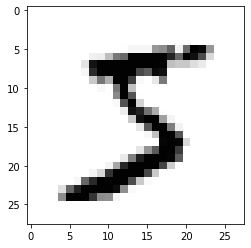

In [ ]:
plt.imshow(x_train[0], cmap='Greys')
print(y_train[3])

In [ ]:
model = tf.keras.models.Sequential(
    [
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(10, activation='softmax')
    ], name= 'model'
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 54,725
Trainable params: 54,725
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.1310 - accuracy: 0.9800


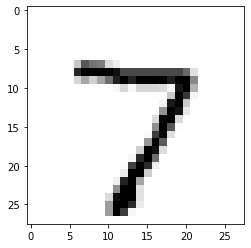

7 









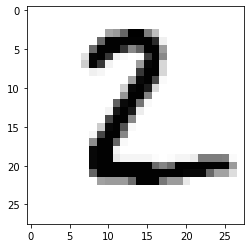

2 









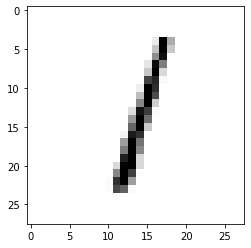

1 









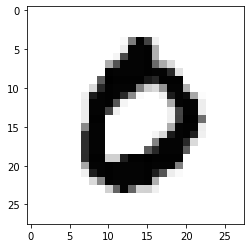

0 









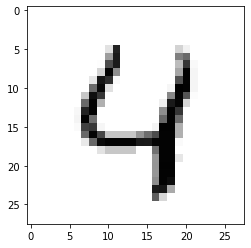

4 









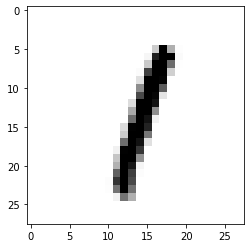

1 









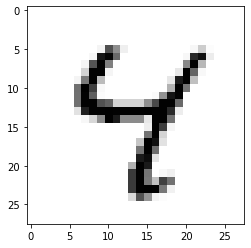

4 









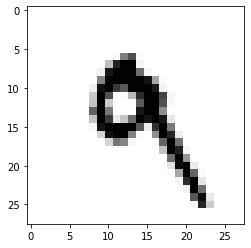

9 









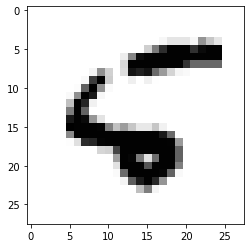

5 









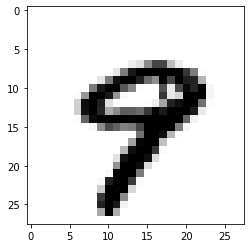

9 









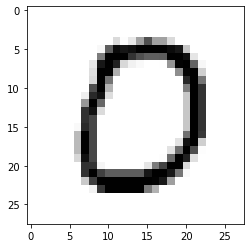

0 









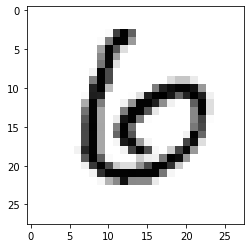

6 









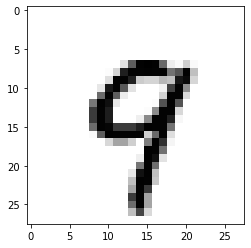

9 









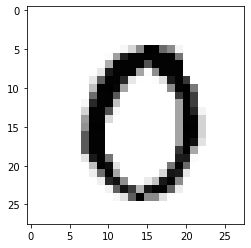

0 









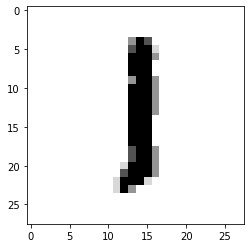

1 









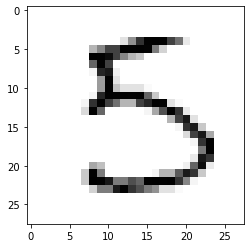

5 









In [ ]:
model.evaluate(x_test, y_test)
probs = model.predict(x_test[:16])
preds = np.argmax(probs,axis=1)
for i in range(16):
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()
    print( preds[i],'\n'*7)